# **Downloading dataset**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten ,MaxPooling2D
import os
import sys
import tensorflow as tf
import random

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youssef25","key":"2e0cd07b5269e2088bd5cca83baa2aa4"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

# **Ravdess Dataframe**


Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [ ]:
%cd /content/

/content


In [ ]:
!mkdir Data

In [ ]:
%cd /content/Data

/content/Data


In [ ]:
!mkdir RAVDESS

In [ ]:
%cd /content/Data/RAVDESS/

/content/Data/RAVDESS


In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 98% 422M/429M [00:03<00:00, 118MB/s] 
100% 429M/429M [00:03<00:00, 114MB/s]


In [ ]:
!unzip /content/Data/RAVDESS/ravdess-emotional-speech-audio.zip

Archive:  /content/Data/RAVDESS/ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  

In [ ]:
Ravdess = "/content/Data/RAVDESS/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(Ravdess)

In [ ]:
ravdess_directory_list

['Actor_05',
 'Actor_01',
 'Actor_11',
 'Actor_18',
 'Actor_06',
 'Actor_03',
 'Actor_13',
 'Actor_10',
 'Actor_22',
 'Actor_17',
 'Actor_14',
 'Actor_02',
 'Actor_24',
 'Actor_16',
 'Actor_23',
 'Actor_07',
 'Actor_15',
 'Actor_19',
 'Actor_21',
 'Actor_20',
 'Actor_12',
 'Actor_04',
 'Actor_09',
 'Actor_08']

In [ ]:
#"03-01-01-01-01-01-01.wav".split('.')[0].split('-')

In [ ]:
file_emotion = []
file_path = []

In [ ]:
for dir in ravdess_directory_list:
  actor = os.listdir(Ravdess + dir)
  for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)  

In [ ]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,sad,/content/Data/RAVDESS/audio_speech_actors_01-2...
1,fear,/content/Data/RAVDESS/audio_speech_actors_01-2...
2,neutral,/content/Data/RAVDESS/audio_speech_actors_01-2...
3,angry,/content/Data/RAVDESS/audio_speech_actors_01-2...
4,calm,/content/Data/RAVDESS/audio_speech_actors_01-2...


# **Crema DataFrame**

These correspond to the emotions:

ANG: Anger 😡

DIS: Disgust 🤢

FEA: Fear 😱

HAP: Happiness 😀

NEU: Neutral 😐

SAD: Sadness 😭

In [ ]:
%cd /content/Data/

/content/Data


In [ ]:
!mkdir CREMA

In [ ]:
%cd /content/Data/CREMA/

/content/Data/CREMA


In [ ]:
!kaggle datasets download -d ejlok1/cremad

 98% 441M/451M [00:03<00:00, 134MB/s]
100% 451M/451M [00:03<00:00, 151MB/s]


In [ ]:
!unzip /content/Data/CREMA/cremad.zip

Streaming output truncated to the last 5000 lines.
  inflating: AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: AudioWAV/1031_IEO_SAD_HI.wav  
  inflating: AudioWAV/1031_IEO_SAD_LO.wav  
  inflating: AudioWAV/1031_IEO_SAD_MD.wav  
  inflating: AudioWAV/103

In [ ]:
#1001_DFA_ANG_XX.wav

In [ ]:
Crema = "/content/Data/CREMA/AudioWAV/"
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
  file_path.append(Crema + file)
  part=file.split('_')
  if part[2] == 'SAD':
      file_emotion.append('sad')
  elif part[2] == 'ANG':
      file_emotion.append('angry')
  elif part[2] == 'DIS':
      file_emotion.append('disgust')
  elif part[2] == 'FEA':
      file_emotion.append('fear')
  elif part[2] == 'HAP':
      file_emotion.append('happy')
  elif part[2] == 'NEU':
      file_emotion.append('neutral')
  else:
      file_emotion.append('Unknown')

In [ ]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,angry,/content/Data/CREMA/AudioWAV/1033_ITS_ANG_XX.wav
1,happy,/content/Data/CREMA/AudioWAV/1090_WSI_HAP_XX.wav
2,fear,/content/Data/CREMA/AudioWAV/1046_MTI_FEA_XX.wav
3,neutral,/content/Data/CREMA/AudioWAV/1074_MTI_NEU_XX.wav
4,disgust,/content/Data/CREMA/AudioWAV/1063_TAI_DIS_XX.wav


# **TESS dataset**

In [ ]:
%cd /content/Data/

/content/Data


In [ ]:
!mkdir TESS

In [ ]:
%cd /content/Data/TESS/

/content/Data/TESS


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 422M/428M [00:03<00:00, 109MB/s]
100% 428M/428M [00:03<00:00, 116MB/s]


In [ ]:
!unzip /content/Data/TESS/toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
Tess = "/content/Data/TESS/TESS Toronto emotional speech set data/"
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
      part = file.split('.')[0]
      part = part.split('_')[2]
      if part=='ps':
        file_emotion.append('surprise')
      else:
        file_emotion.append(part)
      file_path.append(Tess + dir + '/' + file)

In [ ]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
len(Tess_df)

2800

# **SAVEE dataset**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

'a' = 'anger'

'd' = 'disgust'

'f' = 'fear'

'h' = 'happiness'

'n' = 'neutral'

'sa' = 'sadness'

'su' = 'surprise'

In [ ]:
%cd /content/Data/

/content/Data


In [ ]:
!mkdir SAVEE

In [ ]:
%cd /content/Data/SAVEE/

/content/Data/SAVEE


In [ ]:
!pwd

/content/Data/SAVEE


In [ ]:
!kaggle datasets download -d barelydedicated/savee-database

 93% 199M/215M [00:02<00:00, 158MB/s]
100% 215M/215M [00:02<00:00, 85.3MB/s]


In [ ]:
!unzip /content/Data/SAVEE/savee-database.zip

Archive:  /content/Data/SAVEE/savee-database.zip
  inflating: AudioData/DC/a01.wav    
  inflating: AudioData/DC/a02.wav    
  inflating: AudioData/DC/a03.wav    
  inflating: AudioData/DC/a04.wav    
  inflating: AudioData/DC/a05.wav    
  inflating: AudioData/DC/a06.wav    
  inflating: AudioData/DC/a07.wav    
  inflating: AudioData/DC/a08.wav    
  inflating: AudioData/DC/a09.wav    
  inflating: AudioData/DC/a10.wav    
  inflating: AudioData/DC/a11.wav    
  inflating: AudioData/DC/a12.wav    
  inflating: AudioData/DC/a13.wav    
  inflating: AudioData/DC/a14.wav    
  inflating: AudioData/DC/a15.wav    
  inflating: AudioData/DC/d01.wav    
  inflating: AudioData/DC/d02.wav    
  inflating: AudioData/DC/d03.wav    
  inflating: AudioData/DC/d04.wav    
  inflating: AudioData/DC/d05.wav    
  inflating: AudioData/DC/d06.wav    
  inflating: AudioData/DC/d07.wav    
  inflating: AudioData/DC/d08.wav    
  inflating: AudioData/DC/d09.wav    
  inflating: AudioData/DC/d10.wav    
 

In [ ]:
"a01.wav".split('.')[0][0]

'a'

In [ ]:
Savee = "/content/Data/SAVEE/AudioData/"
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []
for dir in savee_directory_list:
  if dir == 'Info.txt' :
    continue
  directories = os.listdir(Savee + dir)
  for file in directories:
    part = file.split('.')[0]
    element = part[:-2]
    if element=='a':
      file_emotion.append('angry')
    elif element=='d':
      file_emotion.append('disgust')
    elif element=='f':
      file_emotion.append('fear')
    elif element=='h':
      file_emotion.append('happy')
    elif element=='n':
      file_emotion.append('neutral')
    elif element=='sa':
      file_emotion.append('sad')
    else:
      file_emotion.append('surprise')
    file_path.append(Savee + dir + '/' + file)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

In [ ]:
Savee_df['Emotions'].value_counts()

neutral     120
surprise     60
happy        60
fear         60
sad          60
angry        60
disgust      60
Name: Emotions, dtype: int64

# **Merging all datasets**

In [ ]:
Savee_df['Emotions'].value_counts()

neutral     120
surprise     60
happy        60
fear         60
sad          60
angry        60
disgust      60
Name: Emotions, dtype: int64

In [ ]:
Tess_df[:2000]['Emotions'].value_counts()

happy       400
disgust     400
fear        400
surprise    400
neutral     200
sad         200
Name: Emotions, dtype: int64

In [ ]:
Ravdess_df

,Emotions,Path
0,sad,/content/Data/RAVDESS/audio_speech_actors_01-2...
1,fear,/content/Data/RAVDESS/audio_speech_actors_01-2...
2,neutral,/content/Data/RAVDESS/audio_speech_actors_01-2...
3,angry,/content/Data/RAVDESS/audio_speech_actors_01-2...
4,calm,/content/Data/RAVDESS/audio_speech_actors_01-2...
...,...,...
1435,happy,/content/Data/RAVDESS/audio_speech_actors_01-2...
1436,disgust,/content/Data/RAVDESS/audio_speech_actors_01-2...
1437,surprise,/content/Data/RAVDESS/audio_speech_actors_01-2...
1438,neutral,/content/Data/RAVDESS/audio_speech_actors_01-2...


In [ ]:
Crema_df[Crema_df['Emotions'] == 'neutral'][:100]['Emotions'].value_counts()

neutral    100
Name: Emotions, dtype: int64

In [ ]:
Ravdess_df[Ravdess_df['Emotions'] != 'calm']['Emotions'].value_counts() + Tess_df[:2000]['Emotions'].value_counts() + Savee_df['Emotions'].value_counts() 

angry         NaN
disgust     652.0
fear        652.0
happy       652.0
neutral     416.0
sad         452.0
surprise    652.0
Name: Emotions, dtype: float64

In [ ]:
all_data = pd.concat([Ravdess_df[Ravdess_df['Emotions'] != 'calm'], Savee_df, Tess_df[:1500], Crema_df[Crema_df['Emotions'] == 'neutral'][:100]], axis = 0)
%cd /content/drive/MyDrive/ML_PROJECTS
all_data.to_csv("all_data.csv",index=False)
all_data.head()

/content/drive/MyDrive/ML_PROJECTS


,Emotions,Path
0,sad,/content/Data/RAVDESS/audio_speech_actors_01-2...
1,fear,/content/Data/RAVDESS/audio_speech_actors_01-2...
2,neutral,/content/Data/RAVDESS/audio_speech_actors_01-2...
3,angry,/content/Data/RAVDESS/audio_speech_actors_01-2...
5,angry,/content/Data/RAVDESS/audio_speech_actors_01-2...


In [ ]:
all_data

,Emotions,Path
0,sad,/content/Data/RAVDESS/audio_speech_actors_01-2...
1,fear,/content/Data/RAVDESS/audio_speech_actors_01-2...
2,neutral,/content/Data/RAVDESS/audio_speech_actors_01-2...
3,angry,/content/Data/RAVDESS/audio_speech_actors_01-2...
5,angry,/content/Data/RAVDESS/audio_speech_actors_01-2...
...,...,...
576,neutral,/content/Data/CREMA/AudioWAV/1066_WSI_NEU_XX.wav
577,neutral,/content/Data/CREMA/AudioWAV/1045_WSI_NEU_XX.wav
581,neutral,/content/Data/CREMA/AudioWAV/1088_WSI_NEU_XX.wav
588,neutral,/content/Data/CREMA/AudioWAV/1013_WSI_NEU_XX.wav


# **Data Visualization**

In [ ]:
all_data['Emotions'].value_counts()

happy       652
disgust     652
angry       652
neutral     516
sad         452
fear        452
surprise    452
Name: Emotions, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


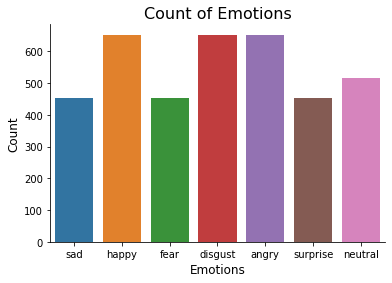

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(all_data.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [ ]:
len(all_data)

3828

In [ ]:
all_data['Emotions'].unique()

array(['sad', 'happy', 'fear', 'disgust', 'angry', 'surprise', 'neutral'],
      dtype=object)

22050


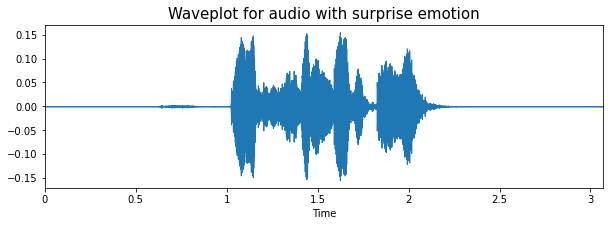

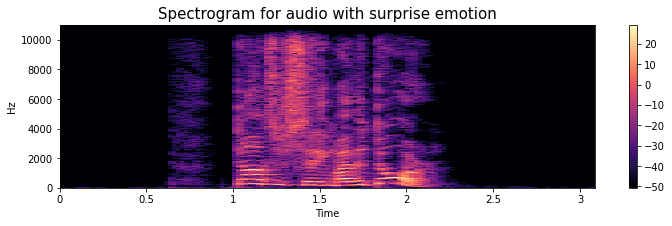

In [ ]:
import random as rnd
mylist = all_data['Emotions'].unique()
emotion = random.choice(mylist)
path = np.array(all_data.Path[all_data.Emotions==emotion])[rnd.randint(0,1000)]
data, sampling_rate = librosa.load(path)
print(sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# **Data Augmentation**

In [ ]:
len(all_data['Path'])

3828

In [ ]:
def noise(data):
    noise_amp = 0.025*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


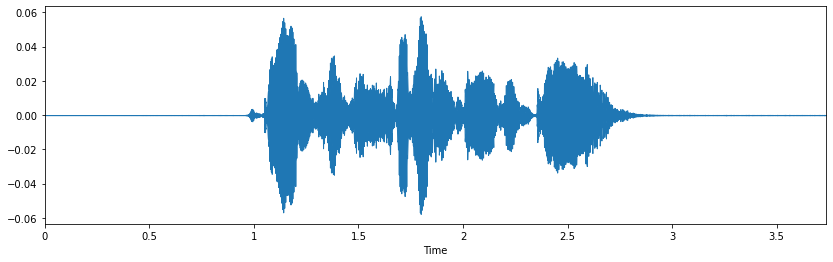

In [ ]:
# taking any example and checking for technique
import random as rnd
path = np.array(Ravdess_df.Path)[rnd.randint(0,len(Ravdess_df['Path']))]
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

## Noise Injection

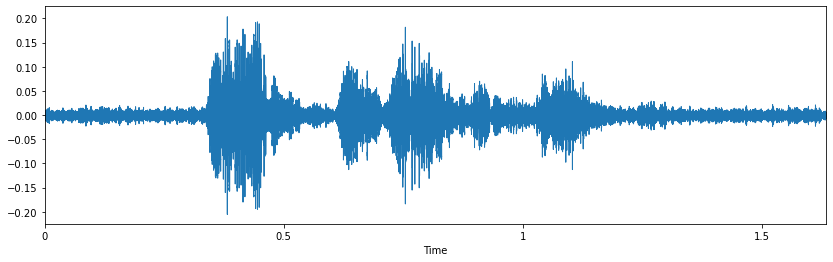

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Stretching

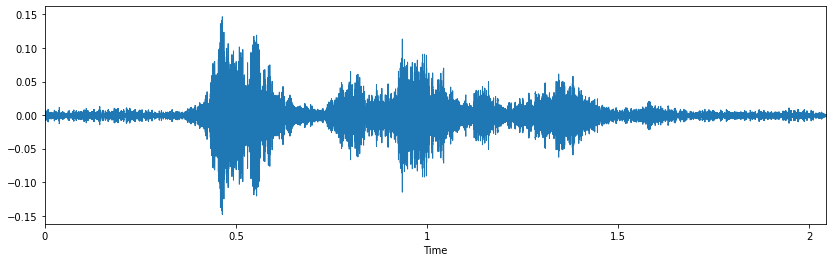

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Shifting

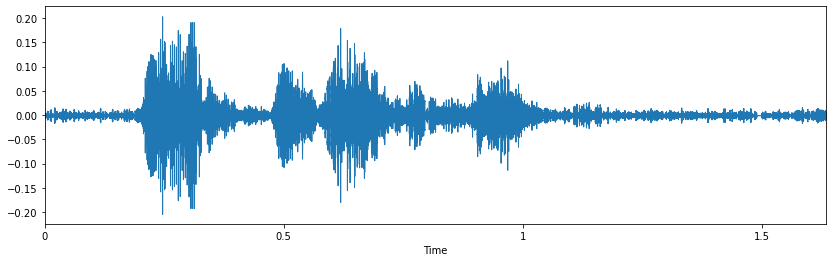

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Pitching

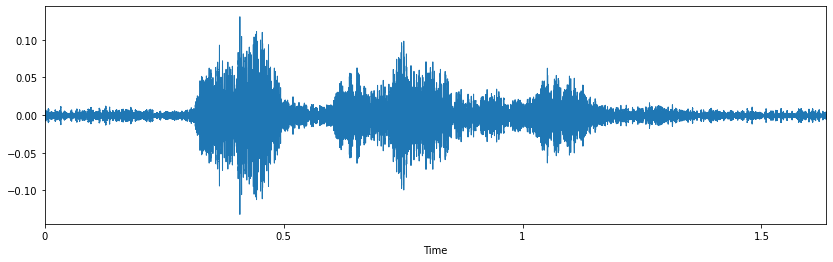

In [ ]:
x = pitch(data, sample_rate,2)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# **Conv2D**

In [ ]:
all_data = pd.read_csv("/content/drive/MyDrive/ML_PROJECTS/all_data.csv")

In [ ]:
all_data['Emotions'].value_counts()

happy       652
disgust     652
surprise    552
neutral     516
fear        452
sad         252
angry       252
Name: Emotions, dtype: int64

In [ ]:
def loading(path):
    data, sampling_rate = librosa.load(path)
    if (len(data) < 3*sampling_rate):
      zero_padding = np.zeros((sampling_rate*3-len(data)))
      data = np.hstack((data,zero_padding))
    else :
      data = data[:sampling_rate*3]
    return data

In [ ]:
def preprocess(file_path): 
    wav = loading(file_path)
    X = librosa.stft(wav)
    X = librosa.amplitude_to_db(abs(X))
    X = np.expand_dims(X,axis=2)
    return X

In [ ]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(all_data['Emotions'])
y = keras.utils.to_categorical(y, num_classes=7)
print(y.shape)

(3328, 7)


In [ ]:
warnings.filterwarnings('ignore')
X, Y = [], []
for path, emotion in zip(all_data.Path, y):
    feature = preprocess(path)
    X.append(feature)
    Y.append(emotion)

In [ ]:
import pickle

with open('X', 'wb') as f:
  pickle.dump(X, f)

with open('Y', 'wb') as f:
  pickle.dump(Y, f)

In [ ]:
%cd /content/drive/MyDrive/ML_PROJECTS/

/content/drive/MyDrive/ML_PROJECTS


In [ ]:
import pickle

with open('X', 'rb') as f:
  X = pickle.load(f) 

with open('Y', 'rb') as f:
  Y = pickle.load(f)

In [ ]:
print(np.array(X).shape)
print(np.array(Y).shape)

(3328, 1025, 130, 1)
(3328, 7)


In [ ]:
np.array(X).shape , np.array(Y).shape

((3328, 1025, 130, 1), (3328, 7))

In [ ]:
Y[1]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=22)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(1025, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 128, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 64, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 62, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 254, 31, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 29, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 14, 32)      0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [ ]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=10, batch_size=16, validation_data=(np.array(x_test), np.array(y_test)))

Epoch 1/10
167/167 [==============================] - 22s 61ms/step - loss: 2.3763 - acc: 0.3464 - val_loss: 1.1320 - val_acc: 0.5676
Epoch 2/10
167/167 [==============================] - 8s 50ms/step - loss: 1.3393 - acc: 0.5710 - val_loss: 1.1009 - val_acc: 0.6096
Epoch 3/10
167/167 [==============================] - 8s 50ms/step - loss: 1.2663 - acc: 0.6236 - val_loss: 0.8049 - val_acc: 0.6877
Epoch 4/10
167/167 [==============================] - 9s 52ms/step - loss: 1.0050 - acc: 0.6495 - val_loss: 0.8020 - val_acc: 0.6877
Epoch 5/10
167/167 [==============================] - 10s 61ms/step - loss: 0.9015 - acc: 0.6893 - val_loss: 0.7726 - val_acc: 0.7117
Epoch 6/10
167/167 [==============================] - 10s 58ms/step - loss: 0.8070 - acc: 0.7115 - val_loss: 0.7873 - val_acc: 0.7342
Epoch 7/10
167/167 [==============================] - 8s 50ms/step - loss: 0.8153 - acc: 0.7400 - val_loss: 0.8634 - val_acc: 0.7057
Epoch 8/10
167/167 [==============================] - 8s 50ms/step

21/21 [==============================] - 1s 38ms/step - loss: 0.8515 - acc: 0.7387
Accuracy of our model on test data :  73.87387156486511 %


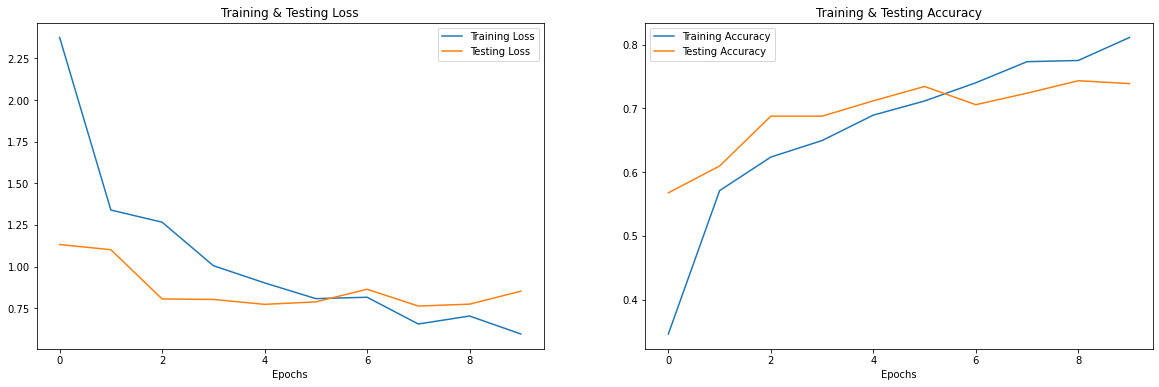

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(np.array(x_test),np.array(y_test))[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()